In [149]:
using DataFrames
using Gadfly
using CSV

In [25]:
data = readtable("population.csv", nastrings=["", "NA", "--"]);

In [71]:
data[:id] = 1:length(data[:Locale])

1:232

In [108]:
x = 1980:2010
y = []
z = []
k = []
for i in x
    y = [y; Symbol(i)]
end
for i in y
    z = [z; String(i)]
end

for i in z
    k = [k; Symbol("x",i)]
end

In [73]:
head(data, 3)

,Locale,x1980,x1981,x1982,x1983,x1984,x1985,x1986,x1987,x1988,x1989,x1990,x1991,x1992,x1993,x1994,x1995,x1996,x1997,x1998,x1999,x2000,x2001,x2002,x2003,x2004,x2005,x2006,x2007,x2008,x2009,x2010,id
,String⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Int64
1,North America,320.276,324.447,328.62,332.725,336.721,340.748,344.895,349.078,353.294,357.685,362.447,367.707,373.291,378.742,383.917,388.972,393.943,398.972,403.856,408.603,413.325,417.832,422.053,426.062,430.269,434.472,438.83,443.347,447.674,451.837,456.593,1
2,Bermuda,0.05473,0.05491,0.05517,0.05551,0.05585,0.05618,0.05651,0.05683,0.05717,0.05749,0.05778,0.0581,0.0587,0.05924,0.05975,0.06029,0.06087,0.06145,0.06198,0.06251,0.06306,0.06361,0.06418,0.06476,0.06534,0.06591,0.06644,0.06692,0.06739,0.06784,0.06827,2
3,Canada,24.5933,24.9,25.2019,25.4563,25.7018,25.9416,26.2038,26.5497,26.8948,27.3793,27.7906,28.1179,28.5449,28.9533,29.3308,29.6905,30.0263,30.3056,30.5517,30.8203,31.0996,31.3767,31.641,31.8893,32.1348,32.3864,32.6567,32.936,33.2127,33.4872,33.7597,3


In [122]:
# Transposiçao de dados
df = stack(data, k);
locais = unstack(df, :variable, :Locale, :value);

In [123]:
head(locais, 3)

,variable,Afghanistan,Africa,Albania,Algeria,American Samoa,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Aruba,Asia & Oceania,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma (Myanmar),Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central & South America,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),Congo (Kinshasa),Cook Islands,Costa Rica,Cote dIvoire (IvoryCoast),Croatia,Cuba,Cyprus,Czech Republic,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Eurasia,Europe,Falkland Islands (Islas Malvinas),Faroe Islands,Fiji,Finland,Former Czechoslovakia,Former Serbia and Montenegro,Former U.S.S.R.,Former Yugoslavia,France,French Guiana,French Polynesia,Gabon,"Gambia, The",Georgia,Germany,"Germany, East","Germany, West",Ghana,Gibraltar,Greece,Greenland,Grenada,Guadeloupe,Guam,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Hawaiian Trade Zone,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,"Korea, North","Korea, South",Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Macau,Macedonia,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Martinique,Mauritania,Mauritius,Mexico,Middle East,Moldova,Mongolia,Montenegro,Montserrat,Morocco,Mozambique,Namibia,Nauru,Nepal,Netherlands,Netherlands Antilles,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Niue,North America,Norway,Oman,Pakistan,Palestine,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Reunion,Romania,Russia,Rwanda,Saint Helena,Saint Kitts and Nevis,Saint Lucia,Saint Pierre and Miquelon,Saint Vincent/Grenadines,Samoa,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor-Leste (East Timor),Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,U.S. Pacific Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,"Virgin Islands, U.S.","Virgin Islands, British",Wake Island,Western Sahara,World,Yemen,Zambia,Zimbabwe
,Symbol,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,F

In [170]:
br = locais[[:variable, :Brazil, :Algeria]];
head(br, 3)

,variable,Brazil,Algeria
,Symbol,Float64⍰,Float64⍰
1,x1980,123.02,18.8061
2,x1981,125.992,19.407
3,x1982,129.028,20.0338


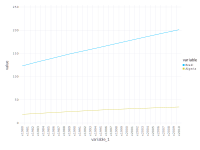

In [174]:
set_default_plot_size(20cm, 15cm)
plot(stack(br, [:Brazil, :Algeria]), x=:variable_1, y=:value, Geom.line, color=:variable)